In [1]:

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [6]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (60000, 784)
Test shape: (10000, 784)


In [7]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:

components = [2, 10, 30, 50]
explained_variances = {}

for n in components:
    pca = PCA(n_components=n)
    pca.fit(X_train_scaled)
    explained_variances[n] = np.sum(pca.explained_variance_ratio_)


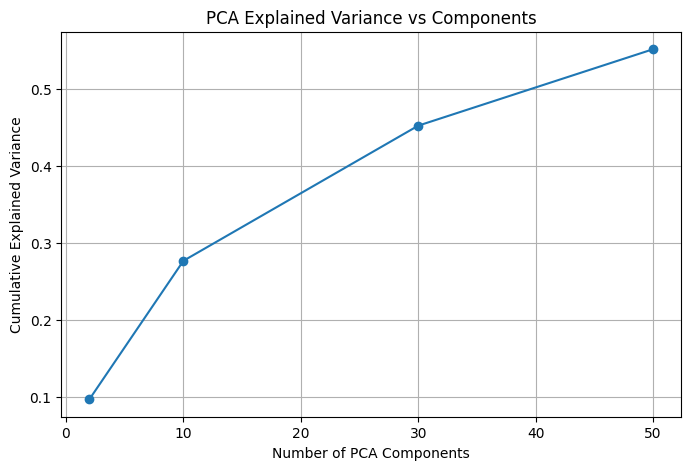

In [5]:

plt.figure(figsize=(8,5))
plt.plot(components, explained_variances.values(), marker='o')
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance vs Components")
plt.grid(True)
plt.show()


In [9]:

pca_50 = PCA(n_components=50)
X_train_pca = pca_50.fit_transform(X_train_scaled)
X_test_pca = pca_50.transform(X_test_scaled)

print("Reduced Train Shape:", X_train_pca.shape)


Reduced Train Shape: (60000, 50)


In [11]:


lr_original = LogisticRegression(max_iter=1000)
lr_original.fit(X_train_scaled, y_train)
y_pred_original = lr_original.predict(X_test_scaled)
acc_original = accuracy_score(y_test, y_pred_original)


In [12]:

lr_pca = LogisticRegression(max_iter=1000)
lr_pca.fit(X_train_pca, y_train)
y_pred_pca = lr_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

print("Accuracy (Original Data):", acc_original)
print("Accuracy (PCA Reduced Data):", acc_pca)


Accuracy (Original Data): 0.9216
Accuracy (PCA Reduced Data): 0.9046


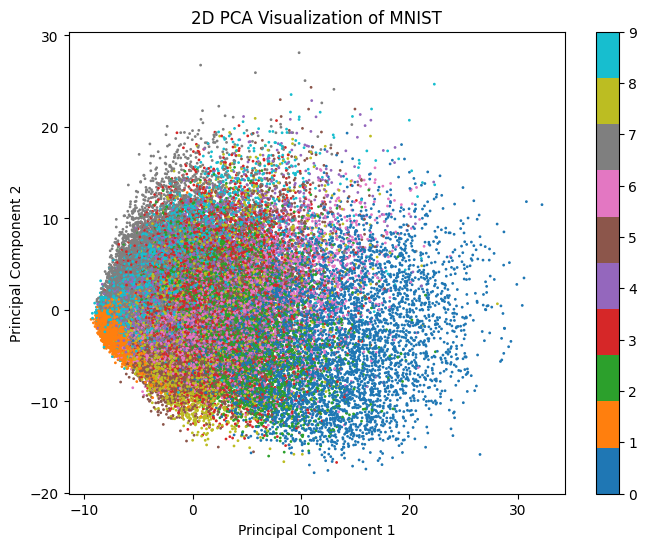

In [13]:
pca_2 = PCA(n_components=2)
X_2d = pca_2.fit_transform(X_train_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_2d[:,0], X_2d[:,1], c=y_train, cmap='tab10', s=1)
plt.colorbar(scatter)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Visualization of MNIST")
plt.show()